# Basic Data Summaries and Visualisations:House Price Data

Our data contains a sample of house prices for a major US metropolitan area. In particular, it shows a house's ID, its selling price (in US$), its size (square feet), the number of bedrooms and bathrooms, the number of offers it has received while being on the market,whether or not it has brick walls, and the neighbourhood where it is located.\
One of the main goals of this analysis is to determine what drives the price of a house.\
**Assumptions**
- It is reasonable to assume that larger houses will fetch a higher price.

**Questions**
- But how much more does the price increase for each additional square foot?
- Does the siding material (i.e., brick vs nonbrick) have a significant impact on price?
- Does it matter in which neighbourhood the house is located?

Answers to these questions could help a potential buyer decide how much to bid for a house. It could also help the seller price the house properly.




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('HousePrices.csv', index_col='ID')

## 1. Investigate distribution of individual variables

### Summary statistics

In [3]:
df.describe()

,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000
mean,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,26868.770371,211.572431,0.725951,0.514492,1.069324
min,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,211200.000000,2590.000000,5.000000,4.000000,6.000000


The average price allows us to obtain a general sense of a typical home's value. We also compute the standard deviation of price to understand how much house prices are fluctuating around that typical value. We compute the histogram of price in order to gauge the shape of the distribution, which could help us determine whether there exist unusual homes (with unusually high or low values)

Looking at the first column, we can learn from the mean that a typical home's value is \\$130427. The house prices are slightly right-skewed since the mean is a bit larger than its median value \\$12590. The most and least expensive houses sold for \\$211200 and \\$69100 respectively. 25% of homes have sold for \\$111325 or less; 25% of homes have sold for \\$148250 or more. So there is a considerable variability in house prices. The standard deviation \\$26868 measures the precise amount of this variability.

We can also learn that the typical house has 3 bedrooms and between 2 to 3 bathrooms. Notice that while the median number of baths is 2, its mean is 2.45 which suggests that there a few outliers with a surprisingly large number of bathrooms. In our case, the largest number of bathrooms is 4. The typical house also has a size of 2000 square feet and it appears that the variability in home size (standard deviation) is not very high at 211 square feet. And finally, we learn that most homes get between two and three offers, however, there also exist some rather unusual homes that have received as many as six offers.






### Histograms

While summary statistics are a great way to summarise important aspects about a distribution in a single number, they are limited because they only capture a single aspect of that distribution. Most of the time, data are too complex to be summarised by a single number only. We want to visualize the entire data distribution.

It is a good idea to plot the data using several different bin widths to avoid being misled by binning artefacts.

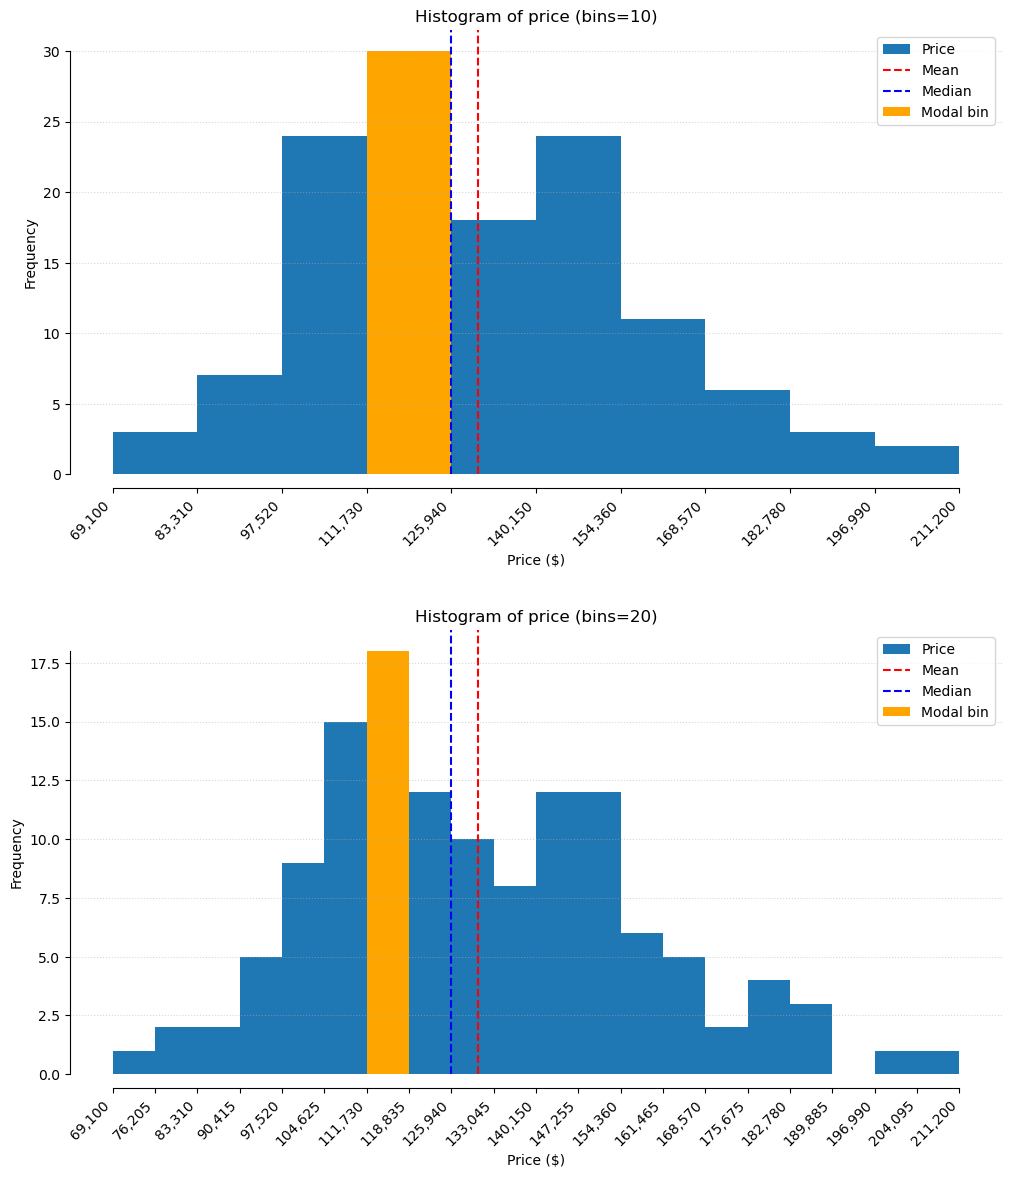

In [21]:
hist,bins = np.histogram(df['Price'])
new_hist, new_bins = np.histogram(df['Price'], bins=20)
#fig, ax = plt.subplots()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,12), layout='constrained')

def price_histogram(ax, df, hist, bins):
    """
    A helper function to make a histogram for price.
    """
    # Plot histogram
    ax.hist('Price',bins=bins,data=df)
    ax.set(title= 'Histogram of price (bins=' + str(len(bins) - 1) + ')', xlabel='Price ($)', ylabel='Frequency')
    ax.set_xticks(bins)
    ax.spines[['top','right']].set_visible(False)
    ax.spines['bottom'].set(position=('outward',10), bounds=(bins.min(), bins.max()))
    ax.spines['left'].set_bounds(0,hist.max())

    # Rotate the labels
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='right')

    ax.xaxis.set_major_formatter('{x:,.0f}')

    # Plot mean and median
    ax.axvline(df['Price'].mean(), c='r', ls='--', label='Mean')
    ax.axvline(df['Price'].median(), c='b', ls='--', label='Median')

    # Plot the modal bin
    modal_bin_index = np.argmax(hist)

    ax.bar(bins[modal_bin_index:modal_bin_index+1],
           hist[modal_bin_index],
           width=bins[1] - bins[0],
           align='edge',
           color='orange',
           label='Modal bin')

    ax.grid(True, axis='y', linestyle=':', alpha=0.5)
    ax.legend()

    return ax

price_histogram(ax1,df, hist=hist, bins=bins)
price_histogram(ax2,df, hist=new_hist, bins=new_bins)
fig.get_layout_engine().set(h_pad=15/72)
plt.show()

The histograms above show house prices ranging from \\$69,100 to \\$211,200. The distribution is not perfectly symmetrical but shows a fairly balanced rise and fall around the central point, with frequencies tapering off on both sides. A notable concentration of sales occurs between \\$100,000 and \\$120,000, forming a prominent bump below the mean. This indicates that while the average house sells for \\$130,427, there is a rather large proportion that sell for significantly less. While most houses are priced below the mean, the average is slightly skewed upward by fewer high-value properties. A secondary peak between \\$140,000 and \\$154,000 suggests a distinct grouping of mid-to-higher priced homes, interrupting the otherwise steady decline.

Implications for pricing strategy
- **Most active segement:** The \\$100k - \\$140k range captures the bulk of sales activity. Sellers aiming for faster transactions may benefit from targeting this zone.
- **High demand zone:** The \\$111k - \\$120k bracket appears particularly dense and could draw strong buyer interest.
- **Less active segment:** Listings above \\$154k fall into a thinner section of the distribution. While not necessarily unviable, sellers in this range should expect a smaller pool of buyers.
- **Investors outlook:** The overall shape of the distribution, lacking heavy skew or long tails, suggests a stable, moderately priced housing market.




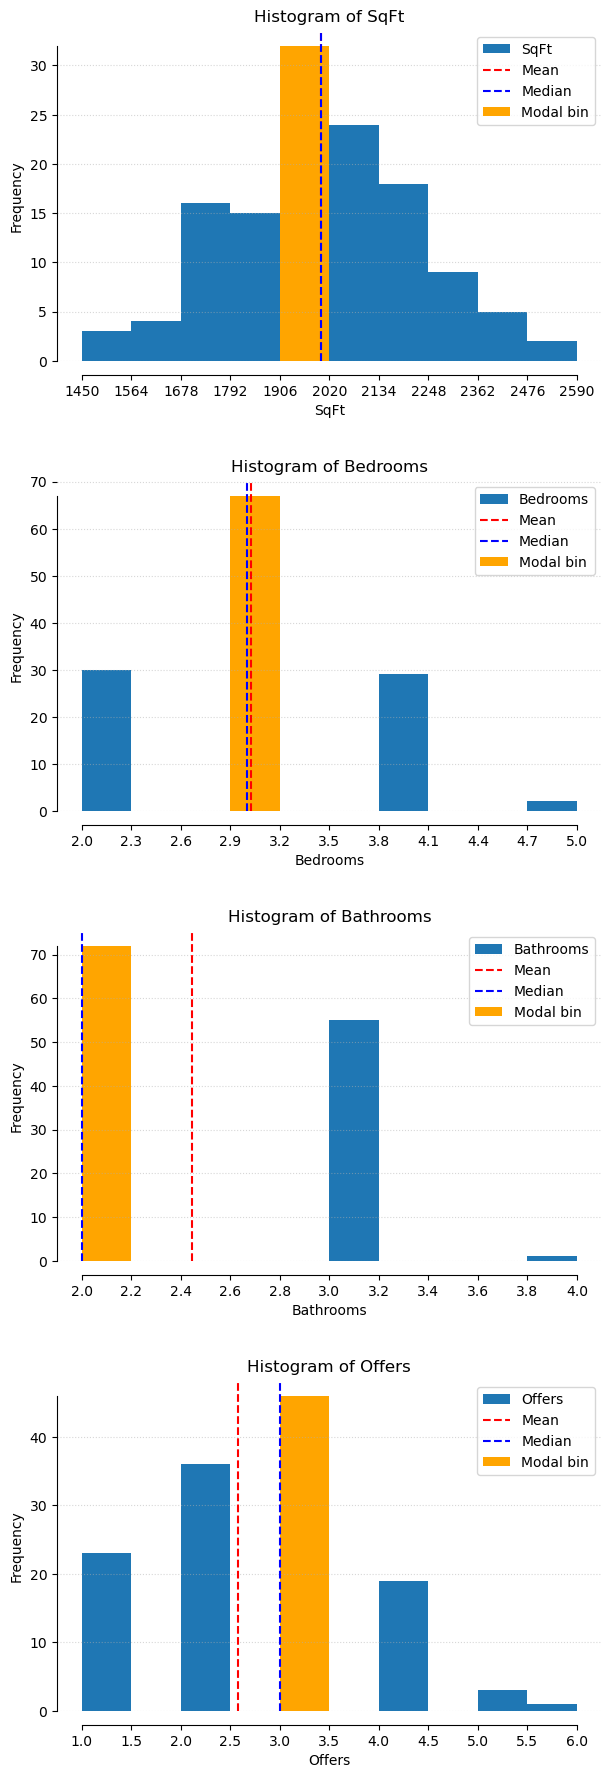

In [39]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(6,18), layout='constrained')

def histogram(ax,df,var,title,xlabel,ylabel):
    """
    A helper function to make a histogram with custom styling.
    """
    hist, bins = np.histogram(df[var])

    ax.hist(var,bins=bins,data=df)
    ax.set(title=title,xlabel=xlabel,ylabel=ylabel)
    ax.set_xticks(bins)
    ax.spines[['top','right']].set_visible(False)
    ax.spines['bottom'].set(position=('outward',10), bounds=(bins.min(), bins.max()))
    ax.spines['left'].set_bounds(0, hist.max())

    # Plot mean and median
    ax.axvline(df[var].mean(), c='r', ls='--', label='Mean')
    ax.axvline(df[var].median(), c='b', ls='--', label='Median')

    # Plot the modal bin
    modal_bin_index = np.argmax(hist)

    ax.bar(bins[modal_bin_index:modal_bin_index+1],
           hist[modal_bin_index],
           width=bins[1] - bins[0],
           align='edge',
           color='orange',
           label='Modal bin')

    ax.grid(True, axis='y', linestyle=':', alpha=0.5)
    ax.legend()

histogram(ax1,df,var='SqFt',title='Histogram of SqFt',xlabel='SqFt',ylabel='Frequency')
histogram(ax2,df,var='Bedrooms',title='Histogram of Bedrooms',xlabel='Bedrooms',ylabel='Frequency')
histogram(ax3,df,var='Bathrooms',title='Histogram of Bathrooms',xlabel='Bathrooms',ylabel='Frequency')
histogram(ax4,df,var='Offers',title='Histogram of Offers',xlabel='Offers',ylabel='Frequency')

fig.get_layout_engine().set(h_pad=15/72)
plt.show()

We can see that while the distribution of a home's size (SqFt) is very symmetrical, the distributions of the remaining three variables are skewed. In the context of discrete variables, the average may not always be a meaningful way of summarising data i.e a house can have either 2 or 3 bathrooms but not 2.44 (as is the mean value). The median is not affected by the difference between discrete and continuous data, and thus provides meaningful answers in both cases.

### Boxplots

An alternative way of visualising the entire distribution of a single variable is via boxplots. A boxplot graphs the quartiles of a distribution. It draws a box between the first and third quartiles and marks the median by a vertical line inside that box. Furthermore, it draws "whiskers" between the outside of the boxes and 1.5 times the interquartile range. Data points beyond the whiskers are considered outliers and are marked by circles. Boxplots convey information similar to the histograms but presents it in a more detailed fashion.

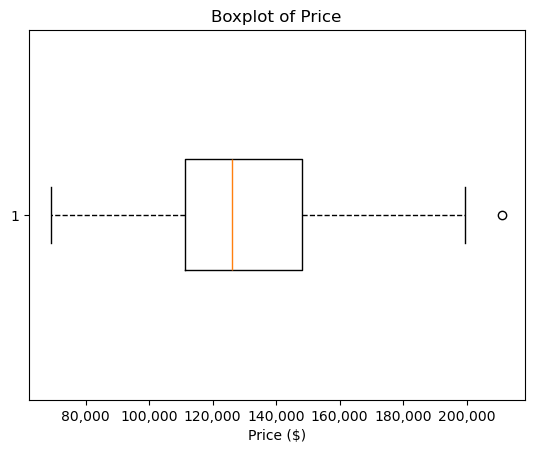

In [56]:
fig, ax = plt.subplots()
ax.boxplot('Price',orientation='horizontal',widths=0.3,
           whiskerprops={'ls':'--'},
           data=df)
ax.xaxis.set_major_formatter('{x:,.0f}')
ax.set(xlabel='Price ($)')

plt.title("Boxplot of Price")
plt.show()

We can now see more clearly that the price distribution is slightly right-skewed. Note the longer whisker to the right side of the box, and the larger area inside the box to the right of the median. This suggests that some sellers manage to fetch a significantly higher price for their home than the rest; from a seller's point of view it would be important to understand what these successful sellers do in order to get such a price premium. We can also identify one potential outlier on the boxplot; this marks a house with a price that is above and beyond the rest.

### Scatterplots

After investigating the distribution of all variables individually, we look at pairwise relationships. Pairwise relationships let us understand whether, for example the price of a house increases with its square footage, or whether an additional bedroom has a stronger impact on price than an additional bathroom. The most common and also most powerful way of exploring pairwise relationships is via scatterplots. Scatterplots graph pairs of variables' values on an X and Y co-ordinate system. Use both correlations and scatterplots simultaneously. Scatterplots allow us to determine whether there exists any relationship and the form of that relationship. Correlation measures allow us to quantify (and hence compare) the strength of this correlation.



[Text(0.5, 0, 'SqFt'), Text(0, 0.5, 'Price')]

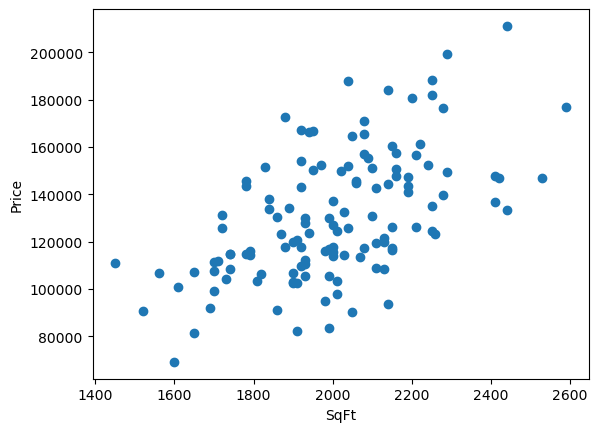

In [57]:
fig,ax = plt.subplots()
ax.scatter('SqFt','Price',data=df)
ax.set(xlabel='SqFt',ylabel='Price')
plt.show()

We can see that there exists a positive relationship between the two ( the larger the square footage, the larger the price). The data points aren't perfectly linear; there's noticeable variation in price even for homes with similar sizes. This suggests that factors beyond square footage also affect the price. We can also see that this relationship appears almost linear. This observation will become important later when we want to model the relationship between price and square footage.

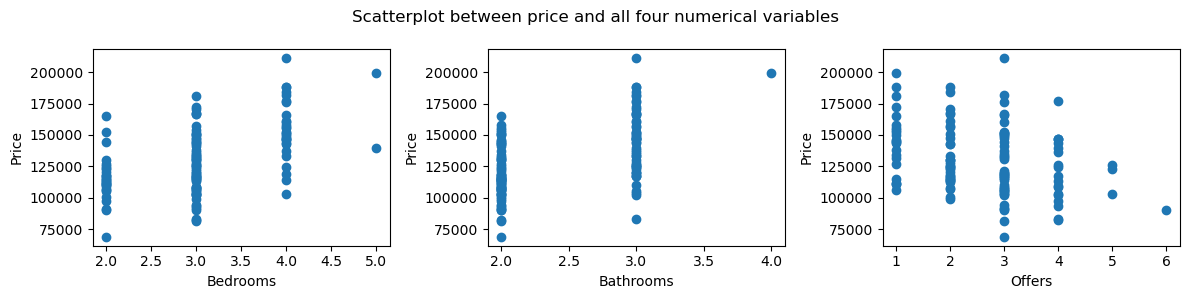

In [70]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(12,3))

ax1.scatter('Bedrooms','Price',data=df)
ax1.set(xlabel='Bedrooms',ylabel='Price')

ax2.scatter('Bathrooms','Price',data=df)
ax2.set(xlabel='Bathrooms',ylabel='Price')

ax3.scatter('Offers','Price',data=df)
ax3.set(xlabel='Offers',ylabel='Price')

fig.suptitle("Scatterplot between price and all four numerical variables")
plt.tight_layout()

Several observations can be made from the plots. First, there appears to be a positive relationship between price and both the number of bedrooms and bathrooms. In contrast, the relationship between price and the number of offers appears negative.

We also see that the scatterplots pertaining to the number of bedrooms and bathrooms are of rather limited use. In fact, since both variables assume only four and three different values, respectively, the information gleaned from the scatterplots is restricted. This illustrates that the use of scatterplots in connection with discrete variables should be done rather carefully.

### Correlations

While scatterplots provide a graphical way of investigating the relationship between pairs of variables, we can augment this graphical approach with a numerical assessment using pairwise correlations. A correlation measures the strength and direction of the linear relationship between two variables. A large positive value implies a stong positive relationship. It is important to remember that correlations only capture linear relationships between two variables; that is, for two variables that have a nonlinear relationship, the correlation may lead to wrong conclusions.

In [12]:
cormat = df.corr()
round(cormat, 2)

,Price,SqFt,Bedrooms,Bathrooms,Offers
Price,1.00,0.55,0.53,0.52,-0.31
SqFt,0.55,1.00,0.48,0.52,0.34
Bedrooms,0.53,0.48,1.00,0.41,0.11
Bathrooms,0.52,0.52,0.41,1.00,0.14
Offers,-0.31,0.34,0.11,0.14,1.00


We can learn from the above table that price has the strongest positive association with SqFt (0.55) and that its correlation with the number of bedrooms and bathrooms - while still positive - is weaker(0.53 and 0.52 respectively)  

This illustrates one of the advantages of correlation measures over scatterplots: while scatterplots also allow us to conclude that price has a positive relationship with all three variables, we could not readily see which variable had the strongest association with price.  

We again observe the negative relationship between the number of offers and price, but we can now also see that this relationship is not very strong (0.31), so while the negative relationship is rather surprising, it may actually not matter (at least not for all practical purposes).  

We can also observe some additional important information. For instance, we can see that there is a rather strong correlation between square footage and the number of bedrooms and bathrooms, respectively. This is not too surprising since one needs a larger home in order to fit a larger number of rooms. However, this finding suggests that some of the information contained in square footage is already captured by the number of bedrooms and bathrooms. This observation will become important later on (multicollinearity) when we try to find good models for price.

### Categorical Data

We explore categorical data using frequency tables that compare the frequencies between individual categories. For instance, the following table shows that most houses are built from nonbrick material

In [6]:
brick_tab = pd.crosstab(index=df['Brick'], columns="count")
brick_tab

col_0,count
Brick,
No,86
Yes,42


In [7]:
ngbor_tab = pd.crosstab(index=df['Neighborhood'], columns="count")
ngbor_tab

col_0,count
Neighborhood,
East,45
North,44
West,39


### Cross-tabulation for Brick and Neighborhood

One alternative to computing the correlation between two categorical variables is to inspect their cross-tabulation.

In [71]:
pd.crosstab(df.Brick, df.Neighborhood)

Neighborhood,East,North,West
Brick,,,
No,26,37,23
Yes,19,7,16


We can learn that the percentage of Brick homes in the North is significantly smaller compared with the East (or the West).